# 202001549 장희권

In [22]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
from tqdm.notebook import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
date_list = pd.date_range("2022-10-01", periods=30, freq="D")

url = "https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=pnt&date="

movie_title = []
movie_point = []
movie_date = []

for today in tqdm(date_list):
    today_url = url + today.strftime("%Y%m%d")
    
    html = urlopen(today_url)
    soup = BeautifulSoup(html, "html.parser")
    
    titles = soup.find_all("div", {"class": "tit5"})
    points = soup.find_all("td", {"class": "point"})
    
    titles_text = []
    points_text = []
    date = []
    
    
    for t, p in zip(titles, points):
        titles_text.append(t.text.strip(" \n"))
        points_text.append(float(p.text))
        date.append(today)
        
    movie_title += titles_text
    movie_point += points_text
    movie_date += date

  0%|          | 0/30 [00:00<?, ?it/s]

In [24]:
df = pd.DataFrame({"date": movie_date, "title": movie_title, "point": movie_point})

movie_point_sort = pd.pivot_table(df, values=["point"], index=["title"], aggfunc=np.mean).sort_values(by="point", ascending=False)
movie_point_sort.head(1)
movie_top_ten = movie_point_sort.head(10)

In [25]:
plt.rc('font', family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
plt.style.use("ggplot")

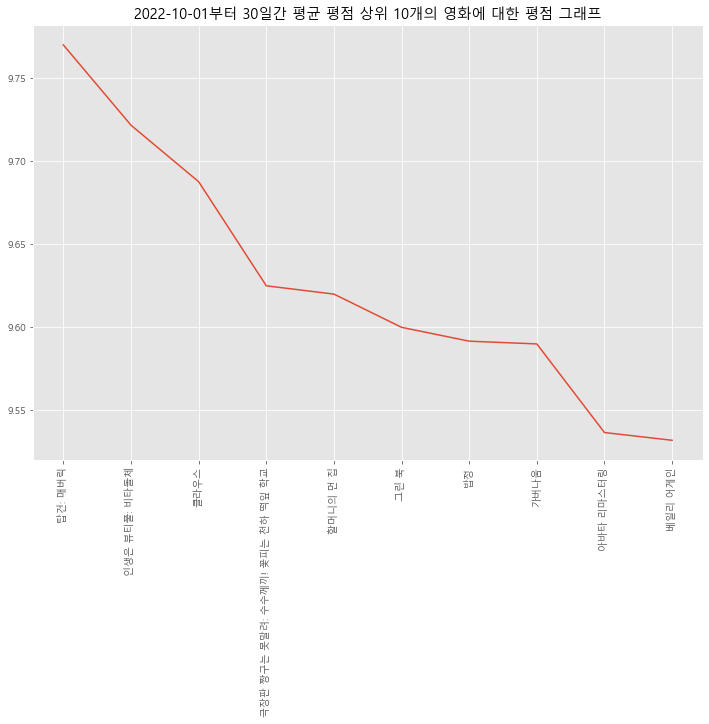

In [26]:
plt.figure(figsize=(12, 8))
plt.title('2022-10-01부터 30일간 평균 평점 상위 10개의 영화에 대한 평점 그래프')
plt.plot(movie_top_ten)
plt.xticks(rotation=90)
plt.show()

# 나의 생각
1. 그 기간 동안 가장 평균 평점이 높은 영화는 탑건: 매버릭이었다. 나도 본 영화지만 진짜 멋있고 가슴이 웅장해지는 톰 크루즈 형님이 주연을 해서 그런지 평점이 높은 거 같다 그리고 그 뒤로는 힐링 영화가 많은 거 같다

# 202001549 장희권